<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/kNN_load_abril_09_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier
import sklearn
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [7]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 


In [8]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [9]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [10]:
from big_segment import Segmenta  # got image provided segmented
from psd_mahotas import Mahotas

In [11]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [12]:
from ANN_FIND_GRAIN_change_ann import AnnGrain  # got image provided segmented

In [13]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [14]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [15]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

foto_segmentada=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [16]:
img = foto_segmentada
df=Segmenta(img)
del df['Width']

In [17]:
print(df)

           0           1           2    ...         781         782         783
0    73.834961   73.653702   73.259735  ...  106.408028   93.151878   86.601006
1   112.665405  109.373802  111.444649  ...  172.366669  200.197601  204.867249
2     1.511967    1.857440   10.617065  ...   75.607697   71.697189   69.053070
3    32.775509   31.591837   34.510204  ...    0.000000    0.000000    0.000000
4    74.793564   73.999603   74.225548  ...   42.464565   30.923723    3.623541
..         ...         ...         ...  ...         ...         ...         ...
45  133.717422  141.780533  144.399185  ...   66.993149   68.310020   67.945137
46  116.154213  120.437508  120.731781  ...   51.629387   61.955647   52.247009
47   23.074965    7.309479    3.145158  ...    2.464031    2.254299    2.469274
48   60.757710   60.977825   63.194702  ...    3.106004    3.132504    3.143862
49  102.803848  101.975311  102.126205  ...    3.005487    3.126200    3.038409

[150 rows x 784 columns]


In [18]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_knn.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado/MarquesGabi_Routines


In [19]:
test_images = np.array(df)

prediction = model.predict(test_images)


print(len(prediction))

150


In [20]:
y_pred = prediction

In [21]:
Grao = []
for i in range(len(prediction)):
  if(prediction[i]==0):
    Grao.append(i)

print(Grao)
    

[]


In [22]:
indice = Grao
# grain class is number zero

In [23]:

Num = len(Grao)
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)


for i in range(Num):
  ixx = indice[i]
  data=np.array(df.iloc[ixx,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)

<Figure size 1800x1800 with 0 Axes>

In [24]:
img = foto_segmentada
df=Segmenta(img)
df_size = df.copy()
print(df_size)

    Width           0           1  ...         781         782         783
0     152  116.666214  113.858719  ...   48.552631   47.380192   37.150276
1     129   87.086899   93.651047  ...   66.939964   67.385918   66.361099
2     140  181.399994  181.360001  ...  111.479996  117.479996  121.279999
3     104   46.464500   54.421600  ...   77.973373   74.923080   77.322495
4     104   56.977814   55.147934  ...    3.000000    3.646450    3.482249
..    ...         ...         ...  ...         ...         ...         ...
45    170  143.544662  151.095093  ...   35.311005   25.631006   17.518341
46    115  133.087311  141.761063  ...  127.165817  127.402260  125.633636
47    194  112.774986  137.010300  ...   51.157612   55.186306   65.602287
48    158   74.376060   66.624420  ...    3.177215    3.080756    3.148053
49    100  112.599998  109.079994  ...   28.566401    2.324800    1.000000

[150 rows x 785 columns]


In [25]:
#y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

In [26]:
indice =[]
count = 0
for valor in y_pred:
  if(valor == 0):
    indice.append(count)
  count = count +1
print(indice)
print(len(indice))


[]
0


In [27]:
del df['Width']
print(df_size)

    Width           0           1  ...         781         782         783
0     152  116.666214  113.858719  ...   48.552631   47.380192   37.150276
1     129   87.086899   93.651047  ...   66.939964   67.385918   66.361099
2     140  181.399994  181.360001  ...  111.479996  117.479996  121.279999
3     104   46.464500   54.421600  ...   77.973373   74.923080   77.322495
4     104   56.977814   55.147934  ...    3.000000    3.646450    3.482249
..    ...         ...         ...  ...         ...         ...         ...
45    170  143.544662  151.095093  ...   35.311005   25.631006   17.518341
46    115  133.087311  141.761063  ...  127.165817  127.402260  125.633636
47    194  112.774986  137.010300  ...   51.157612   55.186306   65.602287
48    158   74.376060   66.624420  ...    3.177215    3.080756    3.148053
49    100  112.599998  109.079994  ...   28.566401    2.324800    1.000000

[150 rows x 785 columns]


In [28]:
print(y_pred.ravel())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [29]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 1):
    Ind.append(k)
  k=k+1

Width=np.array(df_size['Width'])

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])



# print(Width)

# print(df_size.shape)

In [30]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [31]:
Width

array([152, 129, 140, 104, 104, 104, 179, 194, 137, 121, 159, 123, 119,
       167, 192, 160, 194, 181, 110, 196, 175, 168, 135, 175, 189, 199,
       176, 175, 120, 141, 108, 149, 164, 139, 105, 108, 139, 137, 110,
       168, 106, 136, 184, 179, 104, 131, 103, 172, 163, 159, 132, 113,
       122, 130, 167, 111, 107, 124, 177, 100, 181, 134, 171, 148, 187,
       131, 173, 196, 178, 112, 102, 128, 173, 103, 121, 148, 106, 134,
       199, 143, 112, 118, 136, 140, 117, 174, 187, 190, 156, 121, 191,
       117, 145, 120, 131, 148, 182, 147, 192, 168, 126, 168, 131, 136,
       186, 131, 195, 163, 140, 173, 130, 146, 196, 103, 109, 180, 164,
       163, 190, 112, 126, 143, 175, 173, 124, 152, 162, 132, 153, 165,
       149, 124, 159, 124, 116, 186, 132, 194, 178, 156, 128, 197, 142,
       133, 111, 170, 115, 194, 158, 100])

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,116.666214,113.858719,117.673126,128.701523,96.344177,55.038780,63.214684,63.999306,66.040855,68.671745,71.040855,79.412048,88.827560,78.795708,24.128809,15.596260,14.645428,12.373961,11.554708,21.063019,49.159973,64.343491,70.680054,73.397507,73.807480,70.356651,48.135040,20.816483,115.768692,114.658585,112.177277,121.683517,108.689743,58.647503,56.294319,58.253460,63.573402,69.118416,75.482689,84.746536,...,48.700138,48.545700,47.922440,48.992378,50.415512,49.091415,47.864265,48.721607,50.119804,52.292244,48.088642,41.828945,121.633652,125.027695,148.791534,149.790863,139.464691,109.659966,82.997231,91.868416,95.167587,90.279778,44.378117,48.686977,51.212605,48.400280,48.115650,48.686981,49.833107,50.142654,50.702213,49.103878,48.398201,48.076866,47.747925,47.712601,49.470913,48.552631,47.380192,37.150276
1,87.086899,93.651047,94.112854,78.501770,72.825729,67.533264,54.332794,71.977524,101.548523,105.100006,107.355148,109.738426,110.219818,109.463020,109.399681,109.580559,110.224869,113.637878,116.539024,120.523415,135.937622,138.625549,140.298065,140.097946,142.234711,150.540100,160.085526,169.047241,84.482361,92.403641,94.229324,86.751877,71.892136,64.841835,53.005711,75.946037,100.477905,102.283333,105.457909,107.253708,...,79.121330,77.357979,67.317291,62.462410,62.485725,62.684875,60.677902,62.916836,67.992188,71.888107,69.722557,81.152756,86.499733,85.506516,82.422035,83.158882,90.092957,87.673996,83.139771,84.829216,84.168793,82.660118,86.021873,92.290482,91.007690,82.501236,77.349686,79.324440,78.137856,71.633430,63.817619,58.981487,60.469025,60.267952,59.538670,62.663120,64.766296,66.939964,67.385918,66.361099
2,181.399994,181.360001,178.720001,176.800003,186.519989,200.239990,201.839996,205.199997,198.360001,188.039993,181.440002,182.879990,147.720001,112.239998,120.639999,123.239998,130.199997,128.440002,107.279999,102.720001,102.959999,104.360001,107.639999,112.239998,112.639999,114.239998,109.759995,108.879997,173.360001,172.440002,174.919998,172.119995,185.800003,198.959991,204.519989,201.000000,192.479996,188.879990,190.399994,196.679993,...,145.479996,153.959991,150.399994,131.319992,109.879997,104.839996,111.519997,113.320000,114.040001,118.759995,124.079994,122.320000,94.000000,102.559998,108.000000,102.519997,98.759995,93.040001,87.639999,86.119995,86.080002,89.439995,94.959999,96.439995,96.479996,96.079994,97.799995,120.559998,140.520004,143.679993,145.800003,148.479996,148.679993,144.199997,132.919998,113.599998,106.680000,111.479996,117.479996,121.279999
3,46.464500,54.421600,60.406811,61.337284,60.319530,59.451191,58.431957,63.661247,69.179001,72.671608,73.998520,74.849121,74.569534,70.504440,66.772194,62.264801,56.826927,56.010361,61.605034,63.279594,68.721901,76.113914,76.323967,79.087296,84.927513,84.565094,89.318054,91.906807,54.547340,62.673080,69.205627,70.797340,70.980774,70.170128,69.207108,72.714500,75.474854,75.977821,77.427521,78.034027,...,86.933441,97.238174,106.596161,104.210068,104.068047,95.659775,88.340240,86.602074,81.576927,76.147942,74.973389,78.134613,85.369827,92.572495,96.363914,93.755928,91.412735,91.167175,91.235214,86.961548,80.525154,79.420120,81.989647,79.365387,74.414207,72.374268,82.852074,89.150902,91.622787,106.906815,115.026634,119.661247,117.892029,98.538475,86.831367,83.215988,78.218933,77.973373,74.923080,77.322495
4,56.977814,55.147934,59.226337,64.825447,66.631660,65.159767,30.326923,6.755918,14.803255,15.556215,16.846155,15.374262,13.800297,30.375742,53.471901,59.739647,68.192314,74.826927,73.146454,70.835800,74.409775,75.899422,76.094681,79.653854,85.424561,90.702667,89.424568,83.479301,57.316574,57.244091,61.742611,64.965981,64.823975,65.732254,28.261837,5.699705,10.624262,12.686391,13.4541

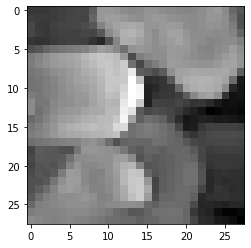

In [33]:
Size=28
qual_img=10
L = Width[qual_img]
data=np.array(df.iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [34]:
mean_value = np.mean(img)
img_new = img.copy()

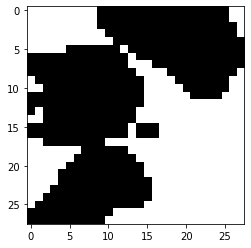

In [38]:

for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0

img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [36]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

12385.31263505402


In [37]:
Area_All, Diameter_All=PSDArea(df_size) 


KeyError: ignored

In [ ]:
df_size.shape

In [ ]:
# print(Area_All)
print(Diameter_All)

In [ ]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
PSD_new

In [ ]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

In [ ]:
np.sum(np.array(Perc_value))

In [ ]:
plt.plot( Perc_value,Perc_new )

In [ ]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [ ]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

In [ ]:
#plt.plot(Diam)
plt.plot(Diameter_All)

In [ ]:
plt.plot(Diam1)

In [ ]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

In [ ]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

In [ ]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)